In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image

SEED = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [3]:
tf.__version__

'2.16.2'

## Explore the Image metadata

In [4]:
# https://pillow.readthedocs.io/en/stable/handbook/concepts.html
modes = {
    '1' :'1-bit pixels, black and white, stored with one pixel per byte',
    'L': '8-bit pixels, grayscale',
    'P' :'8-bit pixels, mapped to any other mode using a color palette',
    'RGB': '3x8-bit pixels, true color',
    'RGBA': '4x8-bit pixels, true color with transparency mask',
    'CMYK': '4x8-bit pixels, color separation',
    'YCbCr': '3x8-bit pixels, color video format',
    'LAB':'3x8-bit pixels, the L*a*b color space',
    'HSV': '3x8-bit pixels, Hue, Saturation, Value color space',
    'I' :'32-bit signed integer pixels',
    'F' :'32-bit floating point pixels'
}
    
def get_meta(data_path):
    file_meta = []
    

    for name in os.listdir(data_path): 
        filepath = os.path.join(data_path, name)

        if '.DS_Store' in filepath:
            continue

        for image_file_name in os.listdir(filepath): 
            image_filepath = os.path.join(filepath, image_file_name)
        
            stats = os.stat(image_filepath)
            img = Image.open(image_filepath)
            
            width, height = img.size

            mode = img.mode
            
            attrs = {
                'category': name,
                'file_name': image_file_name,
                'file_path': image_filepath,
                'size_kb': format(stats.st_size/1024, ".2f"),
                'dimensions': f"{width}x{height}",
                'mode': mode,
                'mode_desc': modes.get(mode, 'unknown')
            
                
            }
            file_meta.append(attrs)
    

    
    return file_meta 

In [5]:
test_data_folder = "./data/FER-2013/train/"

meta = get_meta(test_data_folder)

df_meta = pd.DataFrame(meta)
df_meta.head()

,category,file_name,file_path,size_kb,dimensions,mode,mode_desc
0,happy,Training_50449107.jpg,./data/FER-2013/train/happy/Training_50449107.jpg,1.45,48x48,L,"8-bit pixels, grayscale"
1,happy,Training_70433018.jpg,./data/FER-2013/train/happy/Training_70433018.jpg,1.35,48x48,L,"8-bit pixels, grayscale"
2,happy,Training_85610005.jpg,./data/FER-2013/train/happy/Training_85610005.jpg,1.43,48x48,L,"8-bit pixels, grayscale"
3,happy,Training_4460748.jpg,./data/FER-2013/train/happy/Training_4460748.jpg,1.41,48x48,L,"8-bit pixels, grayscale"
4,happy,Training_6312930.jpg,./data/FER-2013/train/happy/Training_6312930.jpg,1.66,48x48,L,"8-bit pixels, grayscale"


### Randomly sampling images

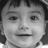

In [7]:
df_meta_sample = df_meta.sample(n=50, replace=False, random_state=42)
df_sample_file_paths = df_meta_sample["file_path"]
categories = list(df_meta_sample["category"])

sample_images = [Image.open(image_path) for image_path in df_sample_file_paths]
sample_images[0]

happy


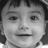

sad


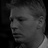

angry


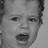

happy


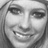

angry


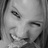

happy


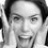

happy


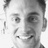

angry


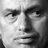

happy


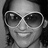

surprise


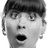

fear


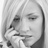

neutral


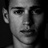

surprise


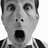

sad


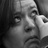

happy


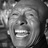

neutral


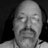

neutral


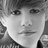

disgust


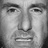

happy


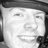

angry


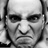

fear


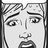

neutral


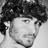

fear


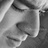

neutral


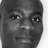

sad


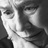

happy


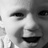

neutral


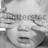

sad


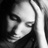

happy


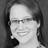

happy


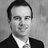

neutral


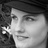

sad


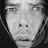

happy


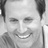

sad


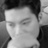

angry


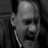

angry


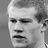

fear


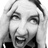

sad


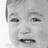

sad


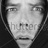

happy


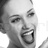

happy


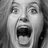

sad


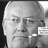

angry


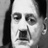

sad


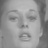

sad


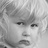

sad


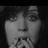

surprise


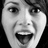

angry


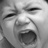

happy


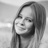

angry


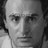

In [8]:
for i, img in enumerate(sample_images):
    print(categories[i])
    display(img)

### Class distribution

Our training images have been categorised into 7 different emotions: 
- angry
- disgust
- fear
- happy
- neutral
- sad
- surprise

We can see that the distribution across classes is very imbalanced. 

In [9]:
df_meta["category"].value_counts()

category
happy       7215
neutral     4965
sad         4830
fear        4097
angry       3995
surprise    3171
disgust      436
Name: count, dtype: int64

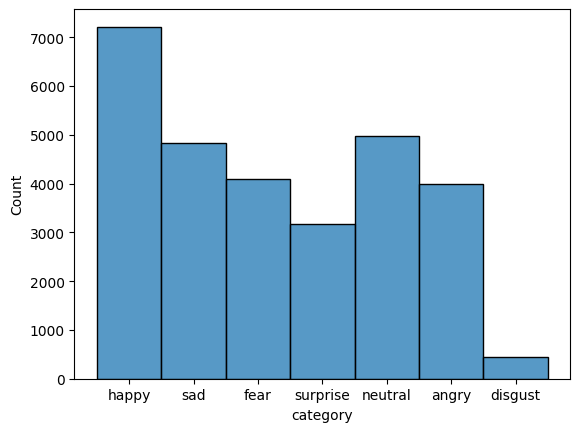

In [10]:
sns.histplot(data=df_meta, x="category")
plt.show()

### Image shape

All of our training data is 48 x 48 pixels.

In [11]:
df_meta["dimensions"].value_counts()

dimensions
48x48    28709
Name: count, dtype: int64

### Data Type

All of our data is grayscale.

In [12]:
df_meta["mode"].value_counts()

mode
L    28709
Name: count, dtype: int64